In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, auc, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [16]:
# load PRJEB7774 data
abundance_data_7774 = pd.read_feather('C:/Users/odesa/Desktop/CRCFinal/PRJEB7774/CLR_PRJEB7774_pooled_abun.feather')
metadata_7774 = pd.read_feather('C:/Users/odesa/Desktop/CRCFinal/PRJEB7774/PRJEB7774_metadata.feather')

In [17]:
print(abundance_data_7774.head(5), abundance_data_7774.head(5))
print(metadata_7774.shape, metadata_7774.head(5))

    Amidase  DD-carboxypeptidase  DD-endopeptidase  DL-endopeptidase  \
0  1.458802             1.364619         -0.424606          0.650875   
1  1.489061             1.394195         -1.160109          0.492511   
2  1.268286             1.294991         -0.641751          0.419880   
3  1.553262             1.290986         -0.937064          0.307668   
4  1.571127             1.788468         -0.887189          0.693385   

   Glucosaminidase  LD-carboxypeptidase  LD-endopeptidase  Muramidase  \
0        -0.045960            -0.660096         -3.961213    1.617578   
1        -0.106474            -0.639886         -2.924873    1.455575   
2        -0.034596            -0.953245         -2.625764    1.272200   
3         0.448735            -0.567833         -3.356634    1.260878   
4        -0.108133            -0.734920         -3.925873    1.603134   

  sample_title  
0    Carcinoma  
1      Control  
2      Control  
3      Adenoma  
4      Control       Amidase  DD-carboxypep

In [18]:
# drop row with missing value
abundance_data_7774 = abundance_data_7774.dropna()

In [19]:
features = abundance_data_7774.drop('sample_title', axis=1)
labels = abundance_data_7774['sample_title']

In [20]:
# Apply PCA
pca = PCA(n_components=2)
abundance_data_pca = pca.fit_transform(features)

In [21]:
principalDf = pd.DataFrame(data=abundance_data_pca, columns=['PC1', 'PC2'])
principalDf['Label'] = labels.values

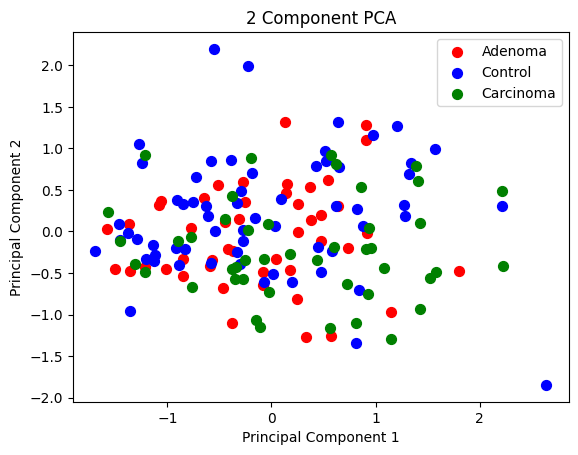

In [23]:
# Plot the principal components, colored by label
fig, ax = plt.subplots()

colors = {'Adenoma': 'red', 'Control': 'blue', 'Carcinoma': 'green'}

# Plot each label as a different color
for label, color in colors.items():
    indicesToKeep = principalDf['Label'] == label
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1'],
               principalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50,
               label=label)  # Add label for legend

# Label axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA')

# Show legend
ax.legend()

# Show plot
plt.show()